### Evaluation Project 3

# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Getting the dataset
df=pd.read_csv('C:/Users/quccs/Downloads/ibm-hr-analytics-employee-attrition-performance (1)/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
# Checking column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Checking the shape
df.shape

(1470, 35)

In [8]:
# Understanding each column datatype and null values if any 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [17]:
#checking the datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [18]:
#Importing Label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
df["Attrition"]=le.fit_transform(df["Attrition"])
df["Attrition"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [20]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [21]:
# Checking the statistics of the dataset
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## EDA

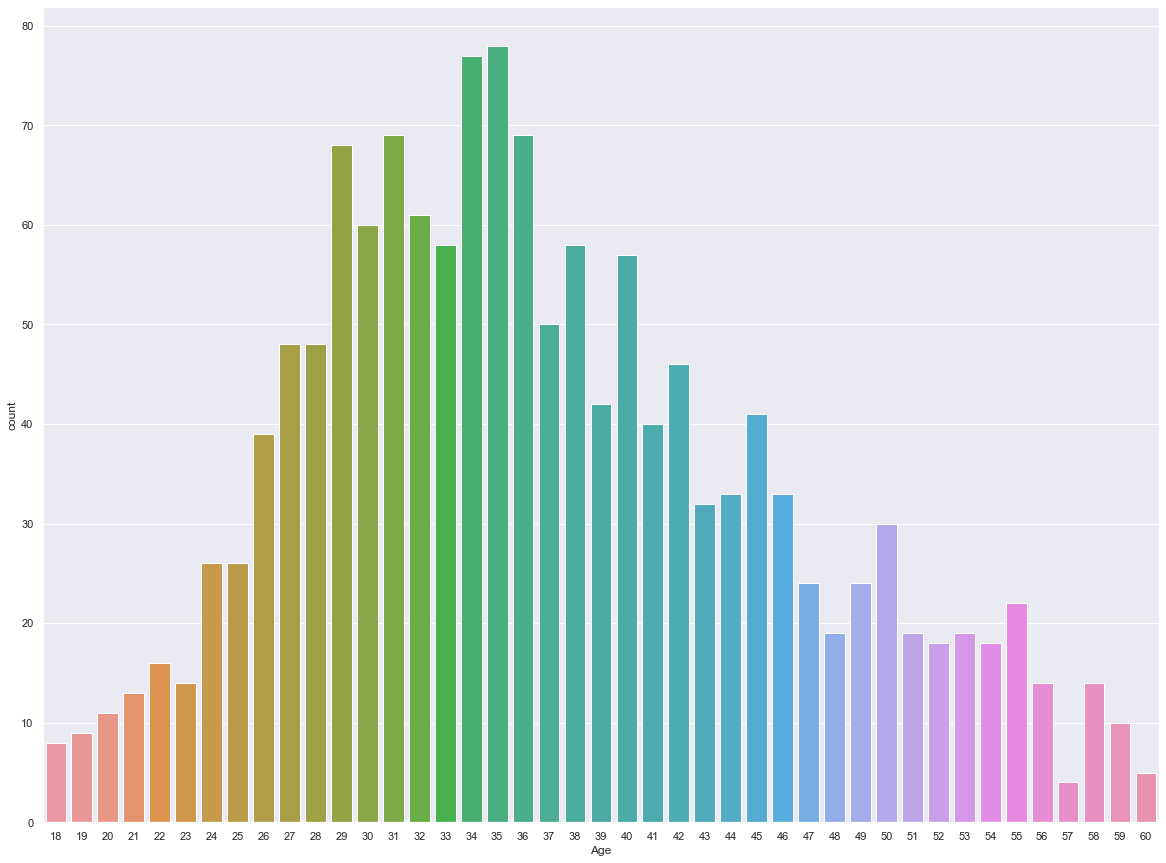

In [46]:
sns.countplot(x="Age",data=df)
sns.set(rc = {'figure.figsize':(15,15)})

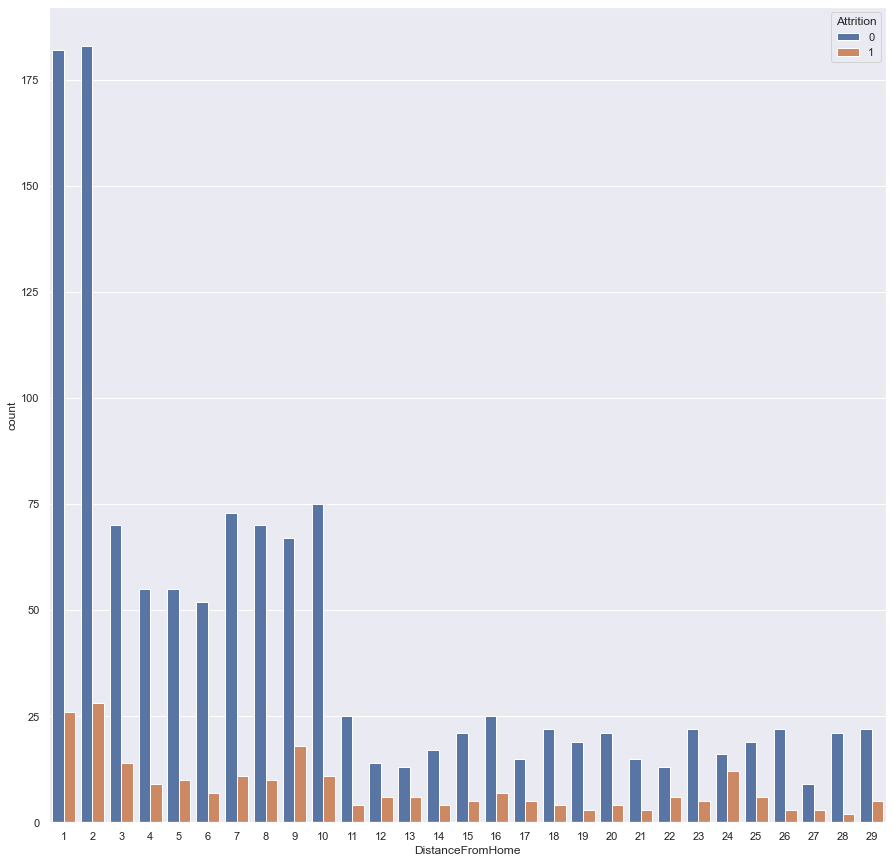

In [52]:
sns.countplot(df['DistanceFromHome'],hue=df['Attrition'])
sns.set(rc = {'figure.figsize':(20,15)})

There is high chance of employee retention for the employees who stayed closer to the company

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

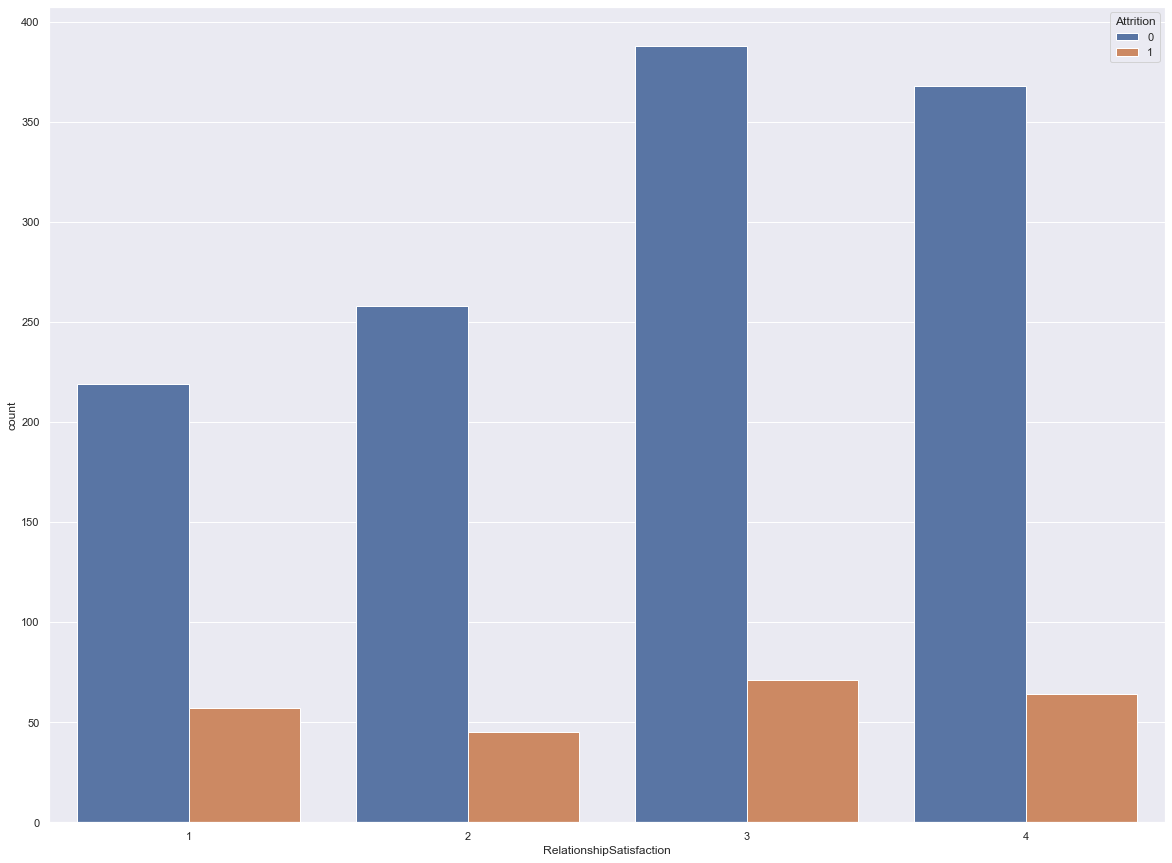

In [54]:
sns.countplot(df['RelationshipSatisfaction'],hue=df['Attrition'])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

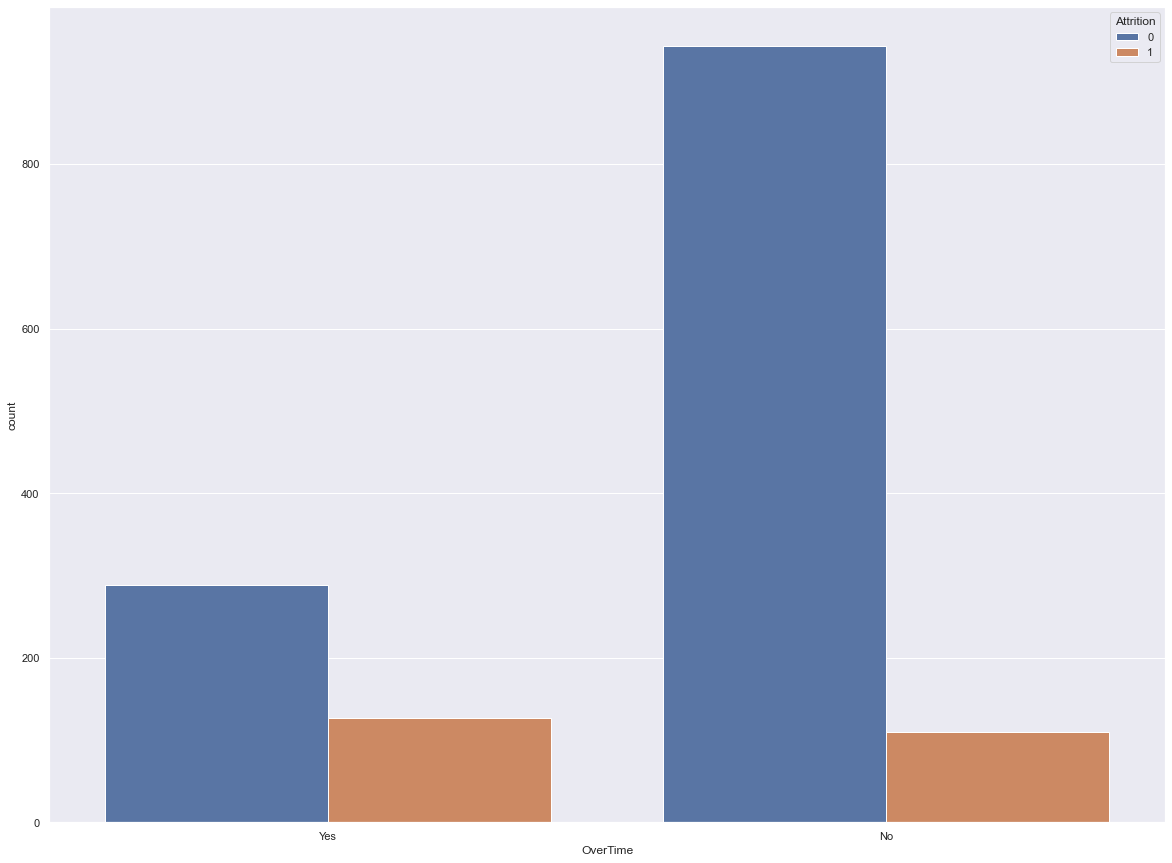

In [59]:
sns.countplot(df['OverTime'],hue=df['Attrition'])

Same attrition rate of employees based on the overtime factor

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

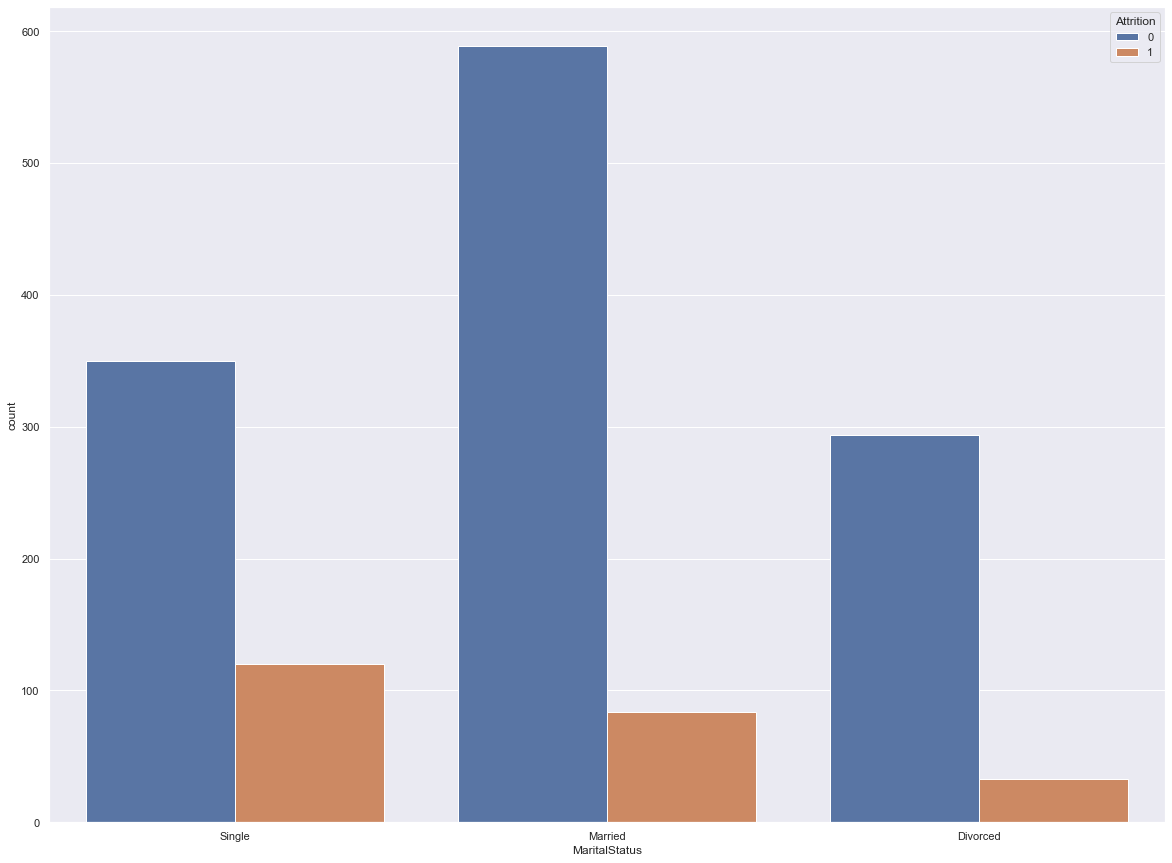

In [60]:
sns.countplot(df['MaritalStatus'],hue=df['Attrition'])

Not much impact on the attrition rate based on their marital status

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

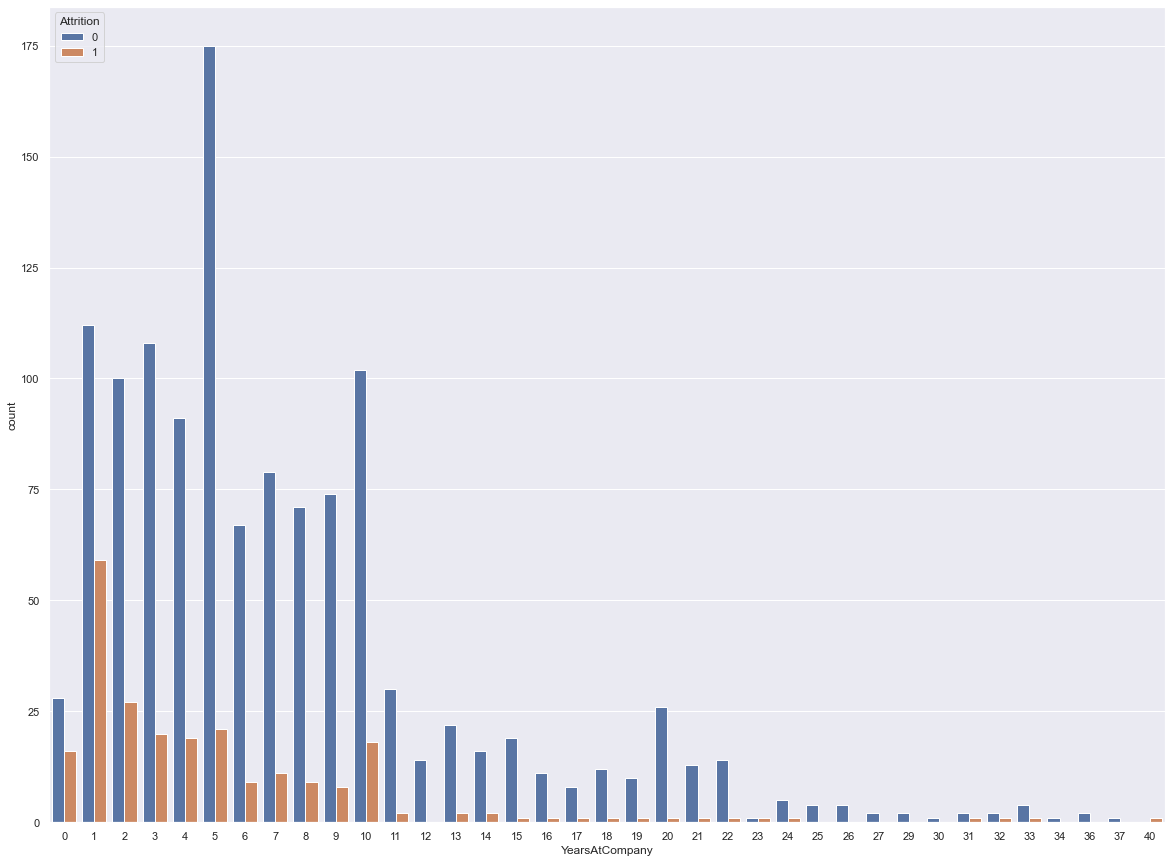

In [62]:
sns.countplot(df['YearsAtCompany'],hue=df['Attrition'])

The attrition rate was very low generally for the employees who stayed for the longer years
The attrition rate was high for the employee duration of 1 to 5 years 
the maximum for the 1 & 2 years

In [67]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

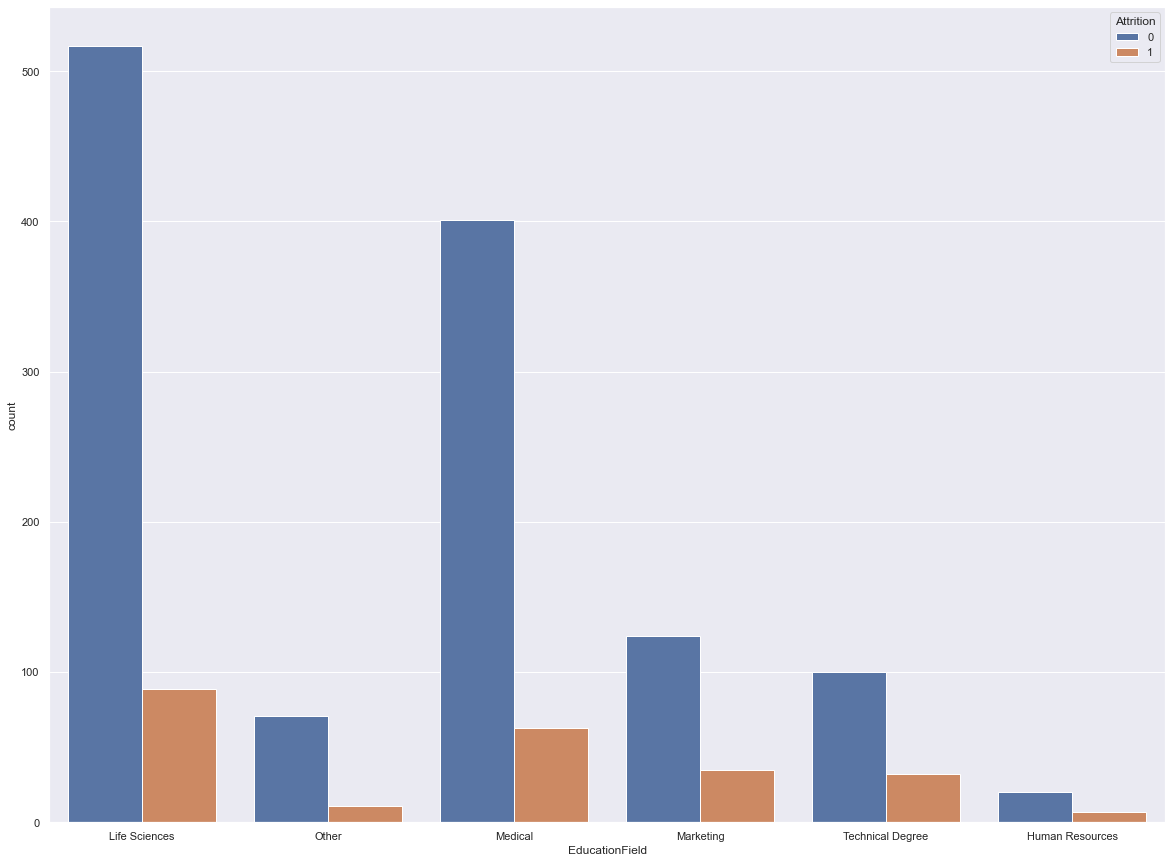

In [68]:
sns.countplot(df['EducationField'],hue=df['Attrition'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

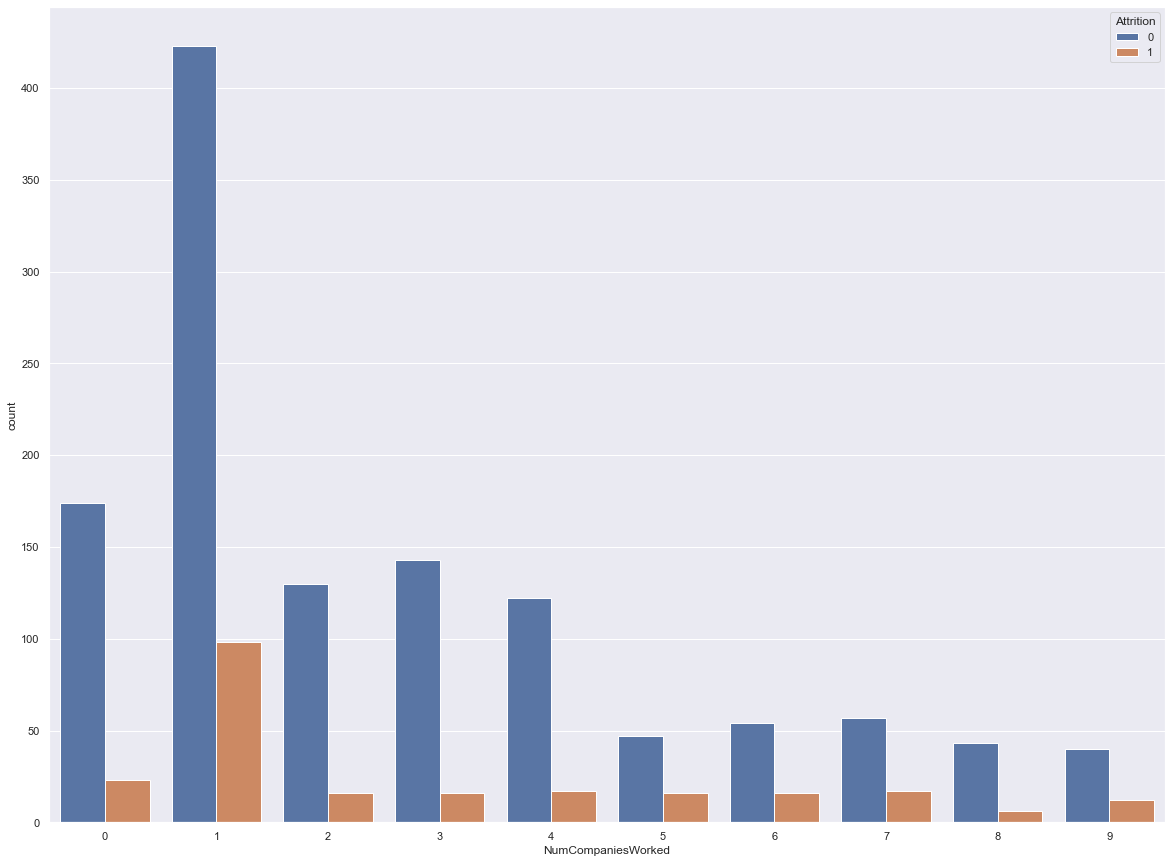

In [71]:
sns.countplot(df['NumCompaniesWorked'],hue=df['Attrition'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

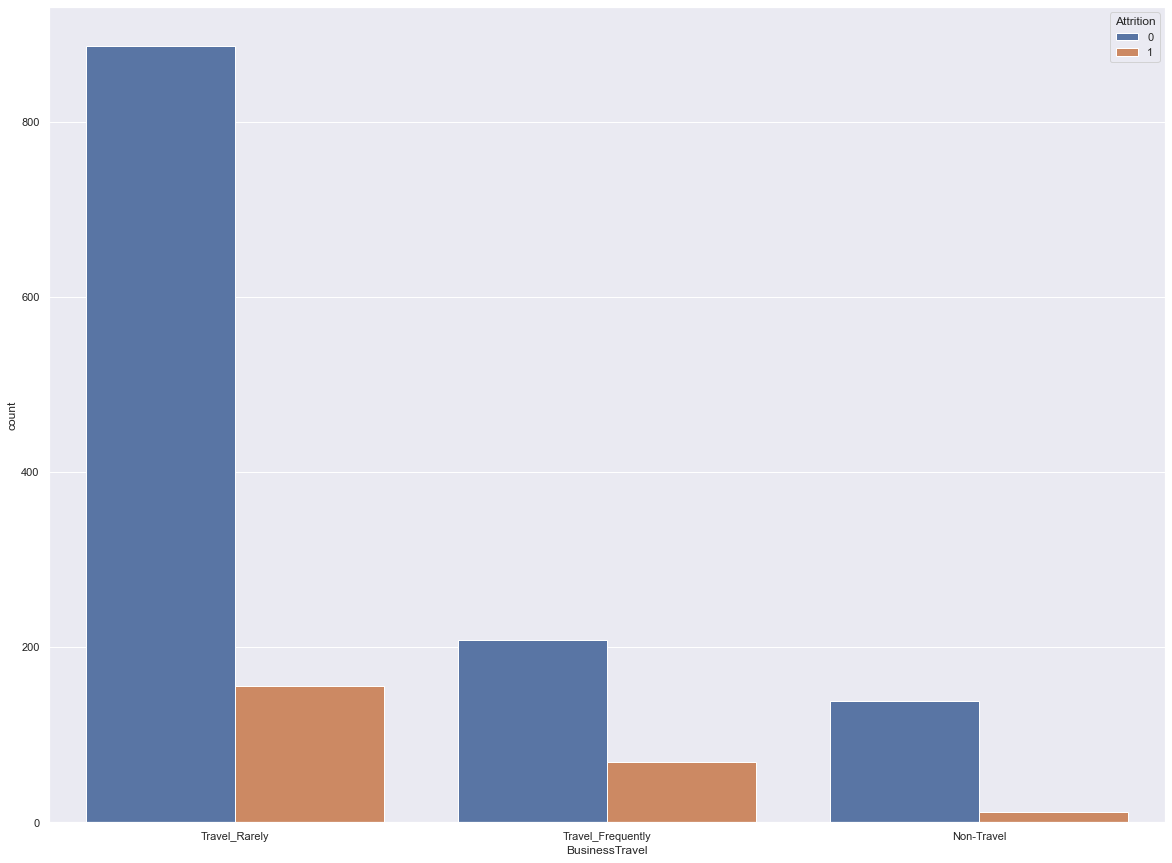

In [76]:
sns.countplot(df['BusinessTravel'],hue=df['Attrition'])

<AxesSubplot:xlabel='Department', ylabel='count'>

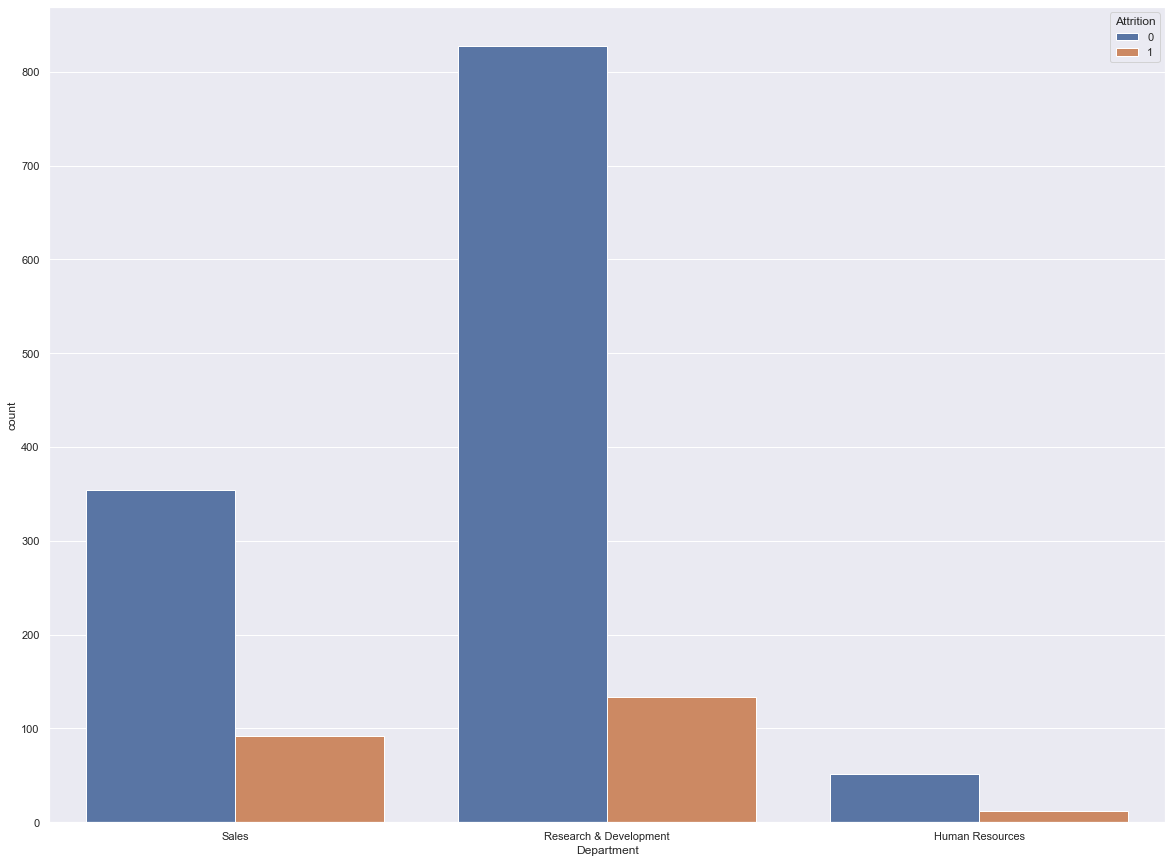

In [77]:
sns.countplot(df['Department'],hue=df['Attrition'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

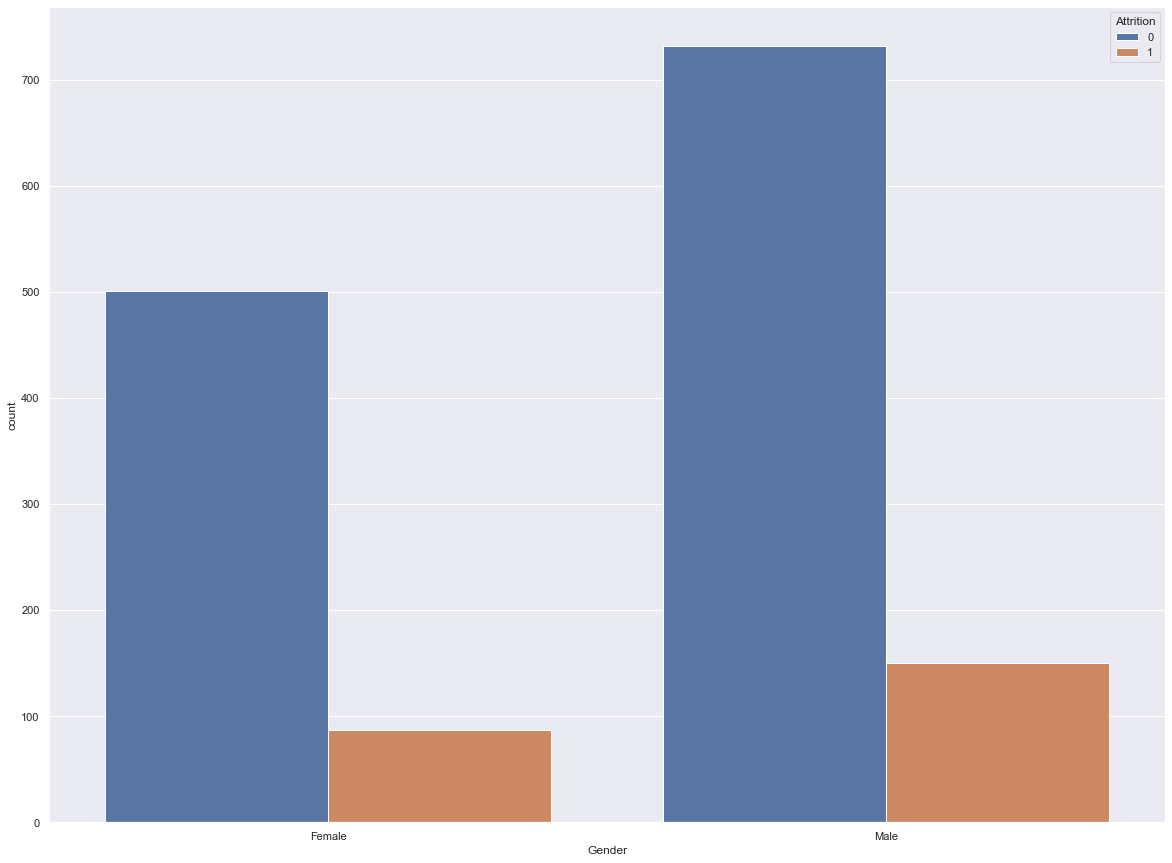

In [55]:
sns.countplot(df['Gender'],hue=df['Attrition'])

<AxesSubplot:>

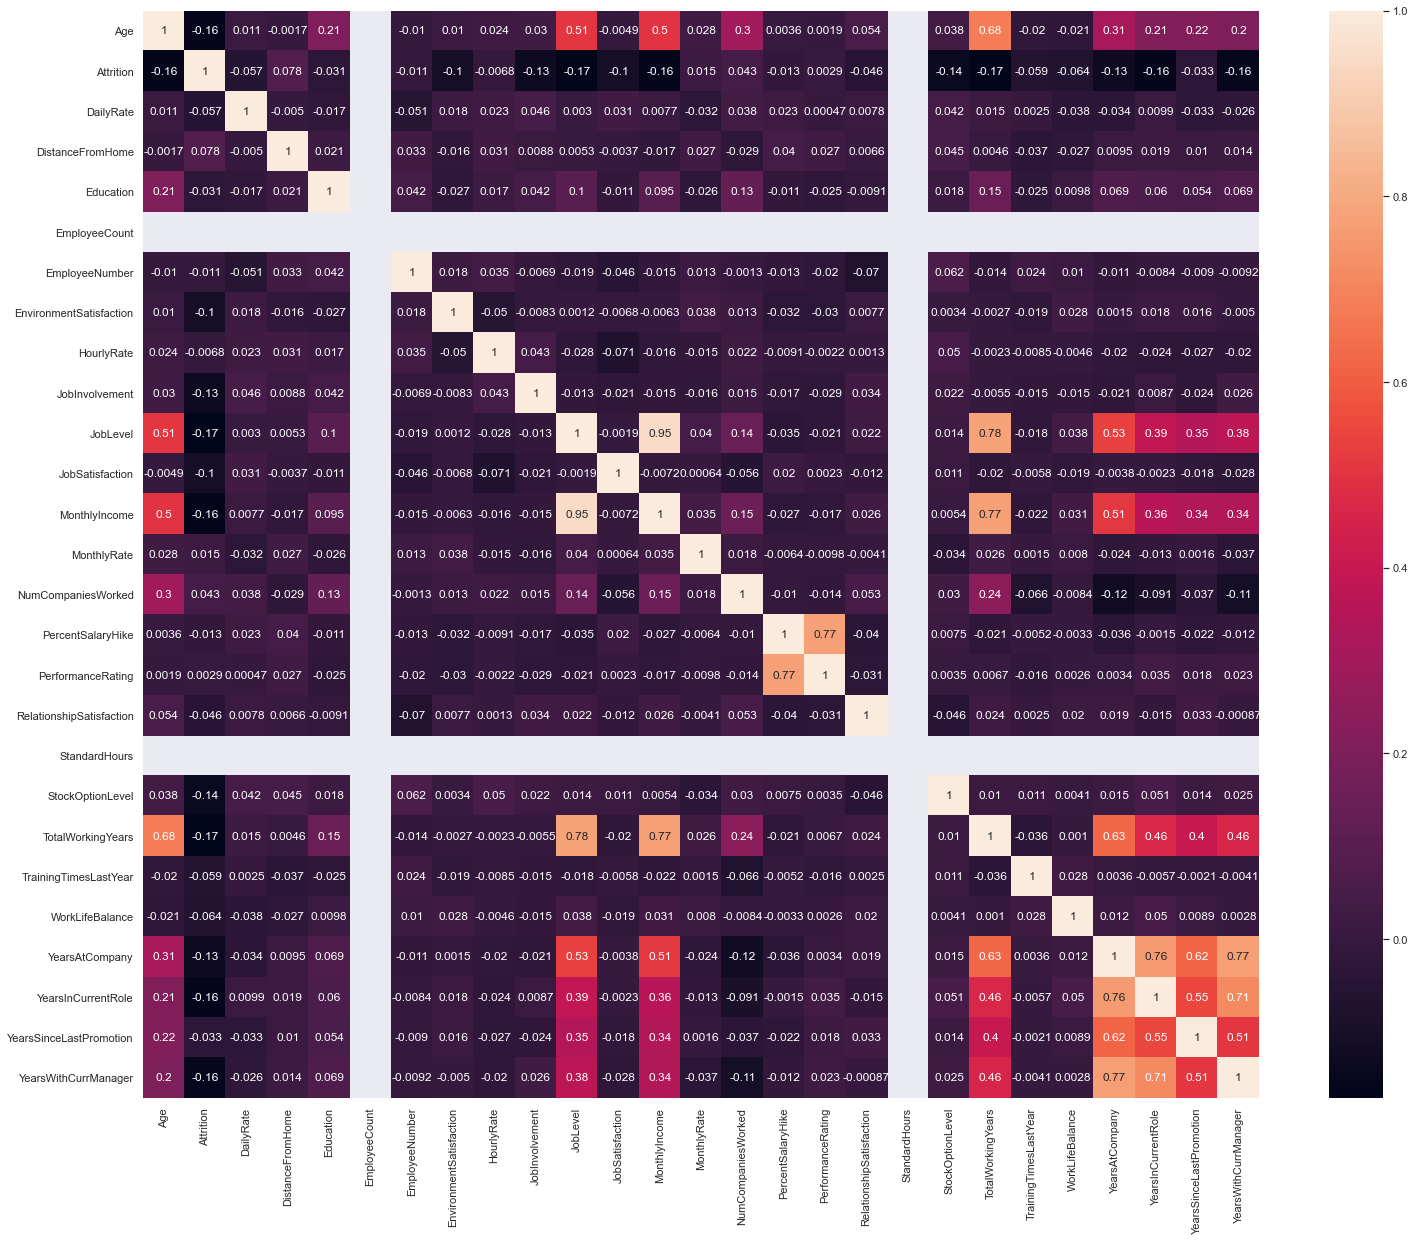

In [56]:
corr=df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True,)

In [58]:
corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [57]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [69]:
#Dropping the column which has less correlational value and based on the EDA analysis done above
# Also the decision of removing fields cannot be made solely on the correlational value as the sample size is small viz
#work life balance, relationship satisfaction, Hourly and daily rate etc .. thus keeping these columns which may have 
#significant contribution for making decision on attrition 

df.drop("EmployeeNumber",axis=1,inplace=True)
df.drop("EducationField",axis=1,inplace=True)
df.drop("OverTime",axis=1,inplace=True)
df.drop("MaritalStatus",axis=1,inplace=True)
df.drop("EmployeeCount",axis=1,inplace=True)


In [72]:
df.drop("NumCompaniesWorked",axis=1,inplace=True)

In [78]:
df.drop("BusinessTravel",axis=1,inplace=True)

In [80]:
df.drop("Department",axis=1,inplace=True)

In [81]:
df.shape

(1470, 27)

In [82]:
df.dtypes

Age                          int64
Attrition                    int32
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
Over18                      object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [83]:
# Converting categorical variables into numerical variables using Lebel Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [84]:
#Gender 
df["Gender"]=le.fit_transform(df["Gender"]) # Where Female is assigned to 0 and male has been given 1 

#JobRole 
df["JobRole"]=le.fit_transform(df["JobRole"])

#Over 18
df["Over18"]=le.fit_transform(df["Over18"])

In [85]:
df.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,0,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,1,61,2,2,...,4,80,1,10,3,3,10,7,1,7


In [89]:
df.dtypes

Age                         int64
Attrition                   int32
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
Over18                      int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [91]:
df.shape

(1470, 27)

In [90]:
# Checking outliers

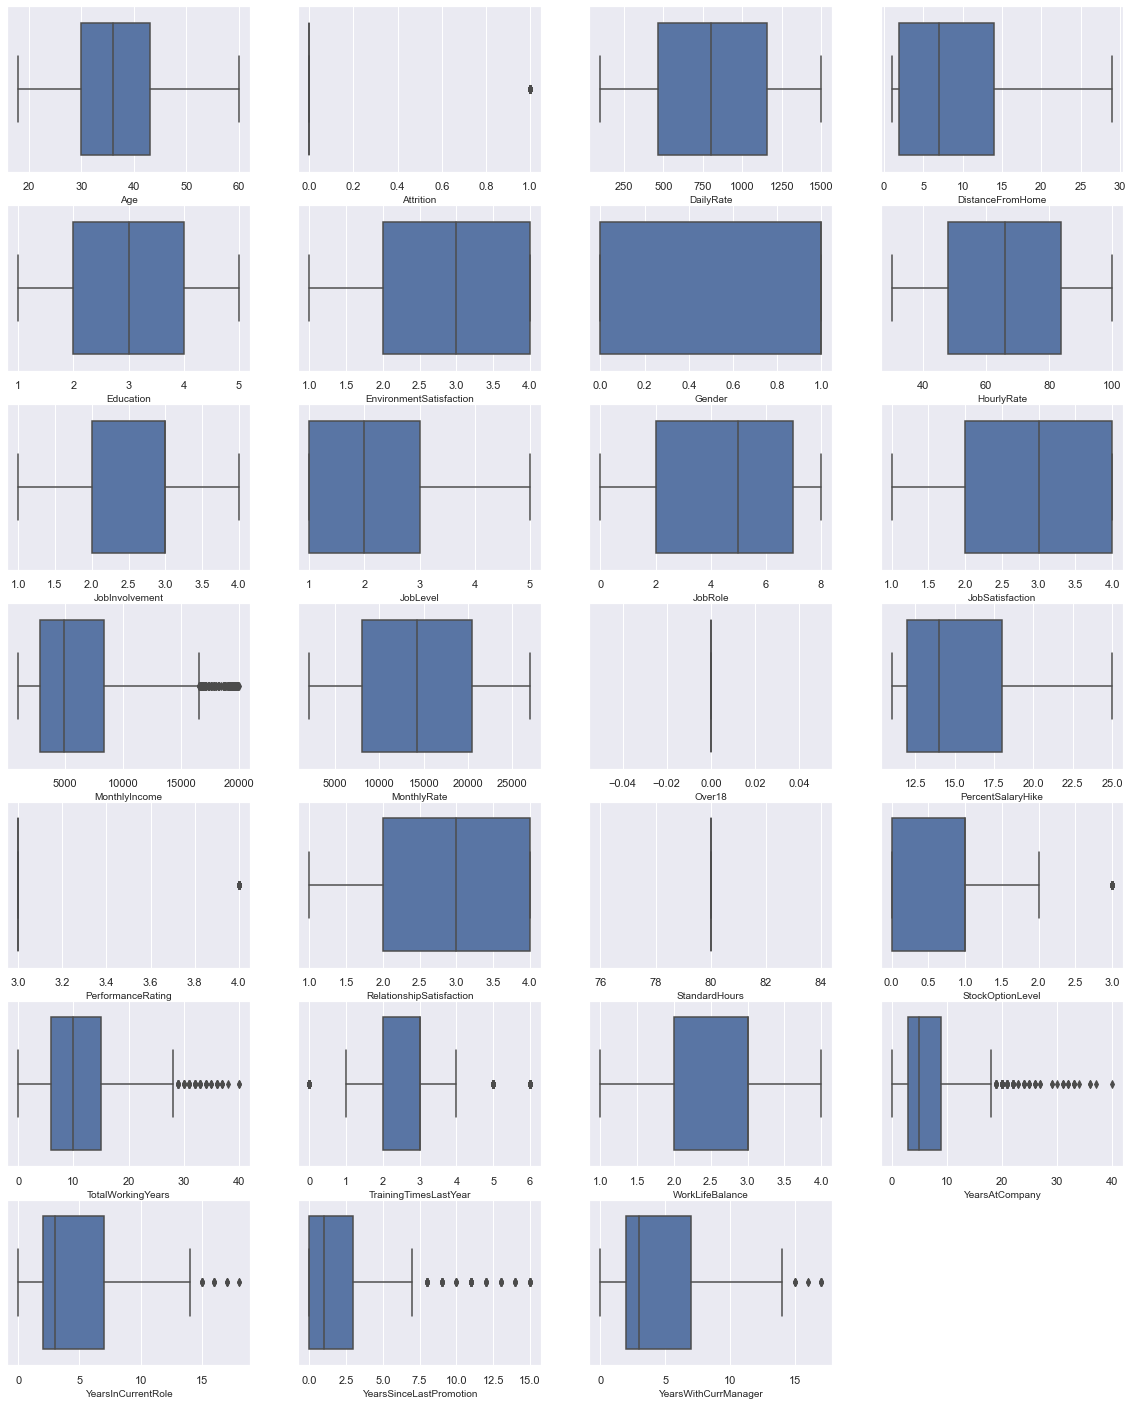

In [95]:
# Checking the outliers  for each column
plt.figure(figsize=(20,25), facecolor ='white')
pltnumber=1

for column in df:
    if pltnumber<=27:
        ax = plt.subplot(7,4,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
    pltnumber +=1
plt.show()  #plt.show()

In [97]:
# Checking for the Skewness in the dataset
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
Over18                      0.000000
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

The skewnees is high in Attrition and years since last promotion followed by years at company

## Feature selection

In [98]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [99]:
#Removing skewness in the dataset using power transform method
#importing power transform from library
from sklearn.preprocessing import power_transform

In [100]:
x=power_transform(x,method="yeo-johnson")
x

array([[ 0.52213976,  0.7592893 , -1.49408458, ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.33459724,  0.24341575, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  1.34036452, -1.03121499, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507, -1.75171312, -0.44229141, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097,  0.58323545, -1.03121499, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832, -0.35884464,  0.24341575, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [101]:
# Scaling the data using standard scaler
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [102]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.52213976,  0.7592893 , -1.49408458, ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.33459724,  0.24341575, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  1.34036452, -1.03121499, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507, -1.75171312, -0.44229141, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097,  0.58323545, -1.03121499, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832, -0.35884464,  0.24341575, ..., -0.08961473,
         0.09685415, -0.40688122]])

# ML Model Building

In [110]:
#importing ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [105]:
#Training the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=56)


In [111]:
# finding the best model
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc=dtc.predict(x_test)
cvscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5).mean()
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))
print("cross val score=",(cvscore*100))

0.7880434782608695
[[267  39]
 [ 39  23]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       306
           1       0.37      0.37      0.37        62

    accuracy                           0.79       368
   macro avg       0.62      0.62      0.62       368
weighted avg       0.79      0.79      0.79       368

cross val score= 76.04524886877829


In [112]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
cvscore=cross_val_score(SVC(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predsvc))
print("confusion matrix=",confusion_matrix(y_test,predsvc))
print("classification report=",classification_report(y_test,predsvc))
print("cross val score=",(cvscore*100))

accuracy score= 0.8369565217391305
confusion matrix= [[304   2]
 [ 58   4]]
classification report=               precision    recall  f1-score   support

           0       0.84      0.99      0.91       306
           1       0.67      0.06      0.12        62

    accuracy                           0.84       368
   macro avg       0.75      0.53      0.51       368
weighted avg       0.81      0.84      0.78       368

cross val score= 84.39325380501852


# The accuracy score is 83%

# Saving the model

In [113]:
#saving the file
import pickle
filename="HRANALYTICS_Attrition rate.pkl"
pickle.dump(svc,open(filename,"wb"))

# AUC- ROC Curve

In [114]:
# importing roc curve from sklearn library
from sklearn.metrics import roc_curve,auc

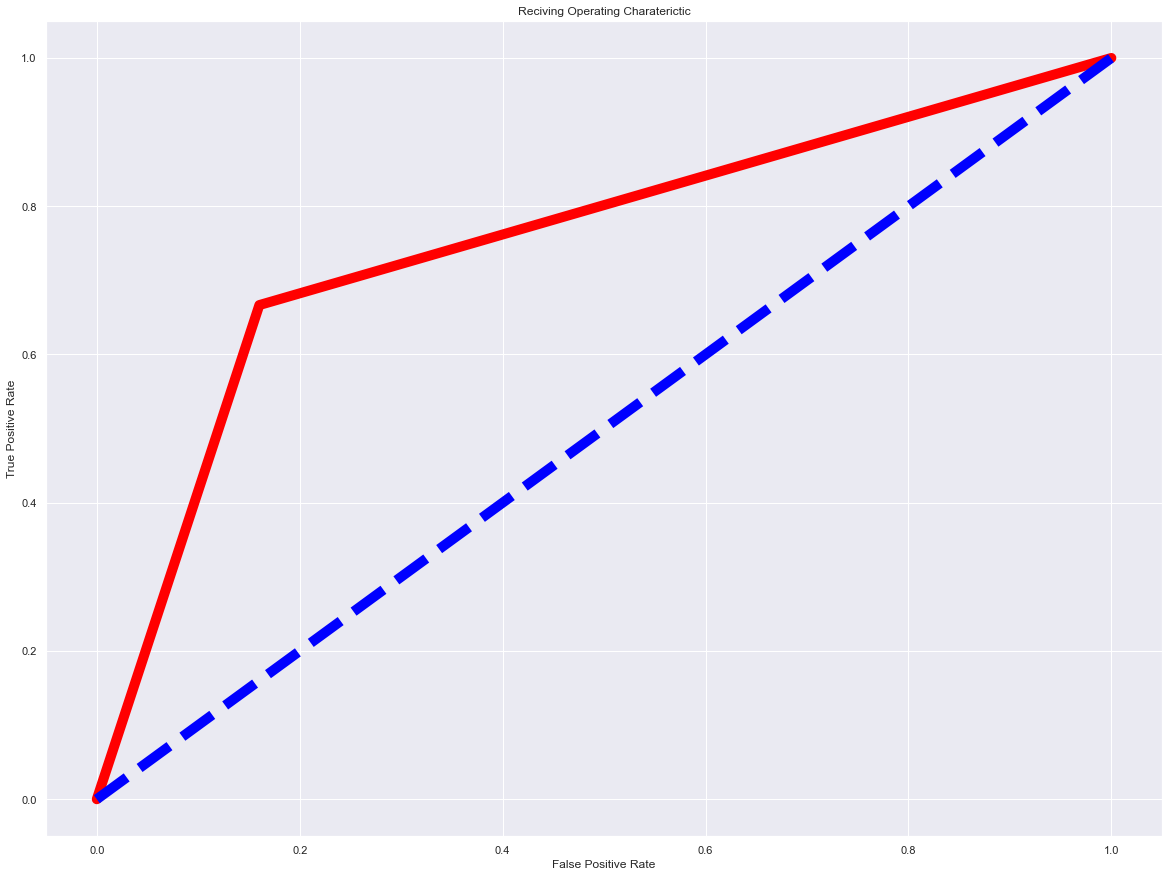

In [117]:
fpr,tpr,threshold=roc_curve(predsvc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="red",lw=10,label="ROC_CURVE (area-%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="blue",lw=10,linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciving Operating Charaterictic")
plt.show()